<a href="https://colab.research.google.com/github/manjunathsirur1994/All-About-Regression/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Classification using KNN

In [115]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [116]:
iris = datasets.load_iris()

In [117]:
x = iris.data[:,:4]
y = iris.target

In [118]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [119]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [120]:
df = pd.DataFrame(x, columns=iris.feature_names)
df['class'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [121]:
df['class'].value_counts()

,count
class,
0,50
1,50
2,50


In [122]:
x_train, x_test ,y_train, y_test = train_test_split(x,y, test_size=0.3)

In [123]:
model = neighbors.KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [124]:
y_pred = model.predict(x_test)
y_pred

array([2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0,
       0])

In [125]:
acc = accuracy_score(y_test, y_pred)
acc

0.9333333333333333

In [126]:
precision_score(y_test, y_pred, average=None)

array([1.        , 0.76923077, 1.        ])

In [127]:
recall_score(y_test, y_pred, average=None)

array([1.    , 1.    , 0.8125])

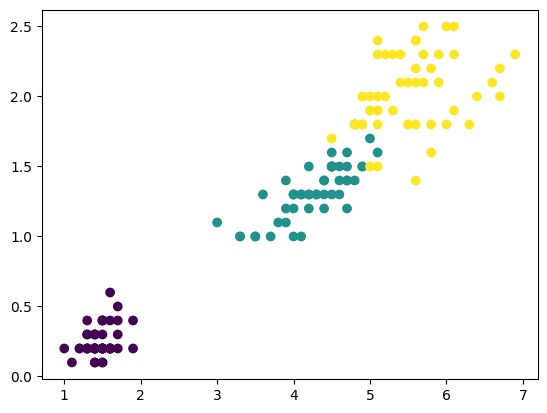

In [128]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['class'])

In [141]:
# KNN for time series with regression

In [142]:
import yfinance as yf

ticker = 'LLOYDSME.NS'
df = yf.download(ticker, start='2020-01-01', multi_level_index=False)
df = df[['Close']]

df.reset_index(inplace=True)

df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)
df['Close_lag4'] = df['Close'].shift(4)
df['Close_lag5'] = df['Close'].shift(5)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['day_name'] = df['Date'].dt.day_name()
df['quarter'] = df['Date'].dt.quarter
df['dayofyear'] = df['Date'].dt.dayofyear
df['weekofyear'] = df['Date'].dt.isocalendar().week
df['isweekend'] = df['dayofweek'] >= 5
df = df.dropna()
df = df.drop(columns=['Date'])

dummies = pd.get_dummies(df['day_name'])
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['day_name'])
df.replace({True: 1, False: 0}, inplace=True)

df

[*********************100%***********************]  1 of 1 completed
<ipython-input-142-9acb9da9611b>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1, False: 0}, inplace=True)


,Close,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,year,month,day,dayofweek,quarter,dayofyear,weekofyear,isweekend,Friday,Monday,Thursday,Tuesday,Wednesday
5,575.099976,558.700012,564.049988,566.250000,544.299988,563.299988,2023,7,24,0,3,205,30,0,0,1,0,0,0
6,574.900024,575.099976,558.700012,564.049988,566.250000,544.299988,2023,7,25,1,3,206,30,0,0,0,0,1,0
7,574.500000,574.900024,575.099976,558.700012,564.049988,566.250000,2023,7,26,2,3,207,30,0,0,0,0,0,1
8,575.500000,574.500000,574.900024,575.099976,558.700012,564.049988,2023,7,27,3,3,208,30,0,0,0,1,0,0
9,596.900024,575.500000,574.500000,574.900024,575.099976,558.700012,2023,7,28,4,3,209,30,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,975.500000,970.150024,978.099976,972.849976,955.750000,950.849976,2024,11,5,1,4,310,45,0,0,0,0,1,0
322,1016.049988,975.500000,970.150024,978.099976,972.849976,955.750000,2024,11,6,2,4,311,45,0,0,0,0,0,1
323,995.750000,1016.049988,975.500000,970.150024,978.099976,972.849976,2024,11,7,3,4,312,45,0,0,0,1,0,0
324,1006.049988,995.750000,1016.049988,975.500000,970.150024,978.099976,2024,11,8,4,4,313,45,0,1,0,0,0,0


In [143]:
x = df.drop(columns=['Close'])
y = df['Close']

x_train = x.head(320)
y_train = y.head(320)
x_test = x.tail(1)
y_test = y.tail(1)

In [144]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [145]:
model = neighbors.KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsRegressor()

In [146]:
y_pred = model.predict(x_test_scaled)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([526.11999512])